In [1]:
using Printf, LinearAlgebra
using JLD2, CairoMakie
using MyTwoLayerNN

In [3]:
set_theme!(theme_latexfonts()) # Theme for plots 
update_theme!(Theme(fontsize = 36)) # 27 for 2 pictures 36 for three pictures
MYORANGE = Makie.RGB(213/255, 94/255, 0/255)

In [5]:
# Path to training folder
DATA_FOLDER = "C:\\Users\\20212202\\Documents\\BEP\\Julia code - Github\\data\\training"

"C:\\Users\\20212202\\Documents\\BEP\\Julia code - Github\\data\\training"

In [6]:
data = load(joinpath(DATA_FOLDER, "a-lag.jld2")) # Default data
t_data = data["t_data"]
nn_data = data["nn_data"]
training_data = data["training_data"]

TrainingData{Float64, Int64}([[-0.5], [-0.16666666666666666], [0.16666666666666666], [0.5]], [0.25, 0.03333333333333333, 0.03333333333333333, 0.25], 4000.0, 100000000)

In [19]:
training_data.learning_rate

4000.0

In [20]:
# Extract training data
xflat = training_data.x |> Iterators.flatten |> collect
xmin, xmax = training_data.x |> Iterators.flatten |> extrema
xvals = range(xmin, xmax, length=100)

-0.5:0.010101010101010102:0.5

In [ ]:
# Choose the NN
nnindex = findfirst(x -> x == 1e8, t_data)
nn = nn_data[end]

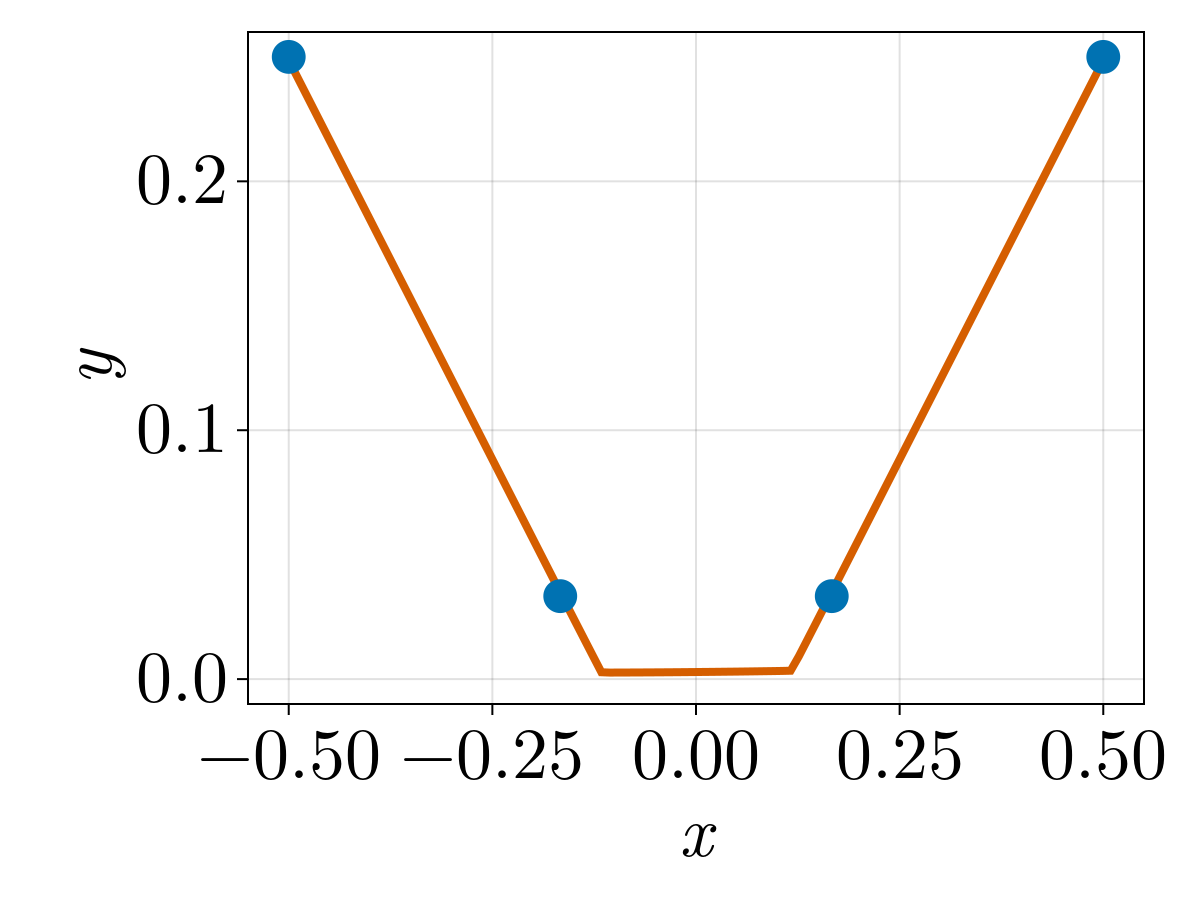

In [28]:
f = Figure()

ax = Axis(f[1, 1], xlabel = L"x", ylabel = L"y", xticks = -0.5:0.25:0.5) # , yticks = [0.0, 0.1, 0.2]

# Draw NN graph
xgrid = range(-0.5, 0.5, length = 100)
lines!(ax, xgrid, [forward(nn, p) for p in xgrid]; color=MYORANGE, linewidth=4)

# Scatter data points
scatter!(ax, xflat, training_data.y; markersize = 24)

# Some more settings
xlims!(ax, -0.5 * 1.1, 0.5 * 1.1)
ylims!(ax, -0.01, 0.26)

colsize!(f.layout, 1, Aspect(1, 4/3))

f

In [29]:
save("line t=end.pdf", f)

CairoMakie.Screen{PDF}


## Trajectories

In [15]:
function color_of_zone(zone)
    zone == 0 && return :gray 
    zone == 1 && return :purple
    zone == 2 && return :blue
    zone == 3 && return :green
    zone == 4 && return MYORANGE
end

function zone_neuron(w, b)
    sum(x -> (b > -w * x), xflat) |> color_of_zone
end

zone_neuron (generic function with 1 method)

In [16]:
mask = nn_data[1].a .< 0 .&& zone_neuron.(vec(nn_data[1].w), nn_data[1].b) .== MYORANGE

# Neurons start in orange with negative a but are not dead in the end
# mask = nn_data[1].a .< 0 .&& zone_neuron.(vec(nn_data[1].w), nn_data[1].b) .== MYORANGE .&& zone_neuron.(vec(nn_data[end].w), nn_data[end].b) .!= :gray

w_data_pos_a = [nn.w[mask] for nn in nn_data] |> stack
b_data_pos_a = [nn.b[mask] for nn in nn_data] |> stack;

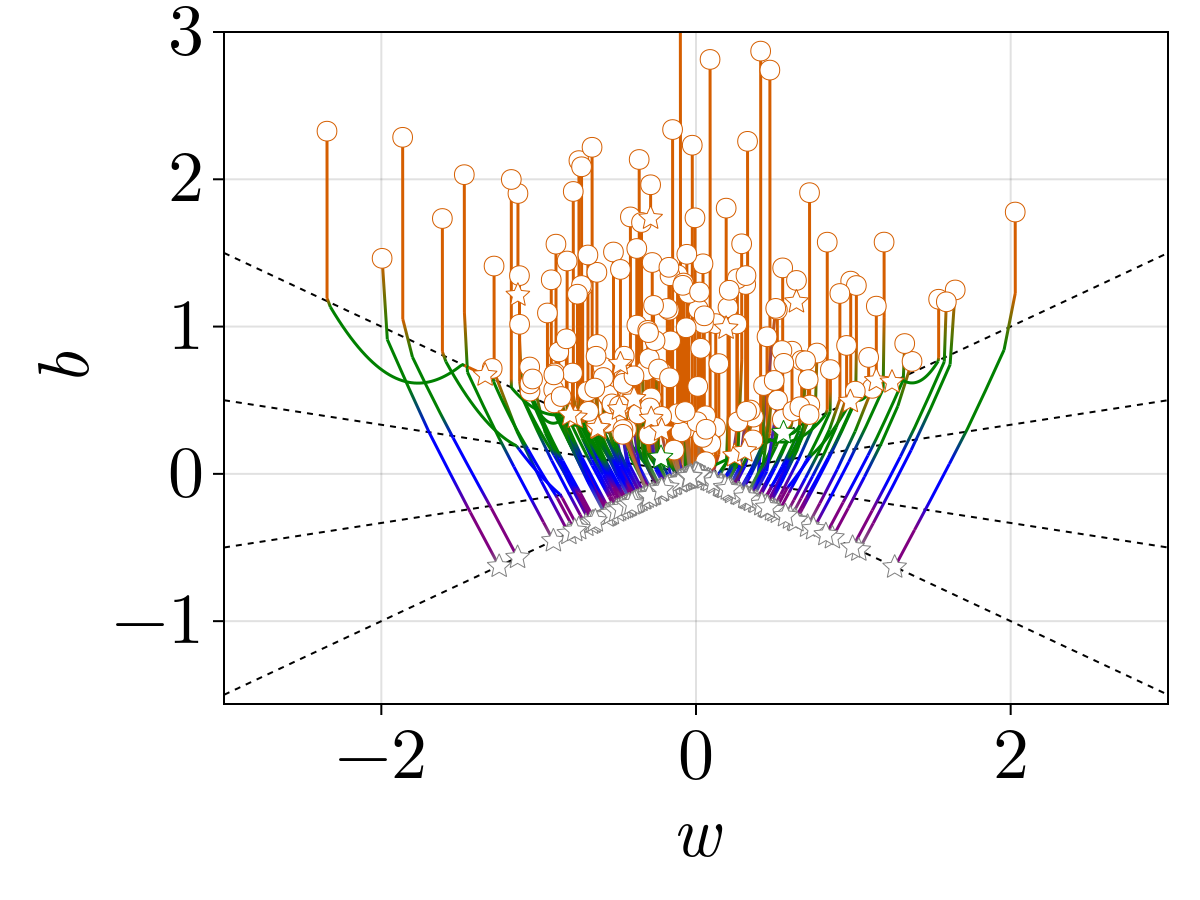

In [17]:
LINEWIDTH_ZONE = 1.0
LINEWIFTH_TRAJ = 1.5
SCATTER_SIZE = 14.0
SCATTER_STROKE = 0.5

f = Figure()
ax = Axis(f[1, 1], xlabel=L"w", ylabel=L"b", xticks=-4:2:4)

# Zone boundaries
ablines!(ax, 0, 1/2; linestyle=:dash, color=:black, linewidth=LINEWIDTH_ZONE)
ablines!(ax, 0, 1/6; linestyle=:dash, color=:black, linewidth=LINEWIDTH_ZONE)
ablines!(ax, 0, -1/6; linestyle=:dash, color=:black, linewidth=LINEWIDTH_ZONE)
ablines!(ax, 0, -1/2; linestyle=:dash, color=:black, linewidth=LINEWIDTH_ZONE)

# Neuron trajactories
for i in 1:size(w_data_pos_a, 1)
    lines!(ax, w_data_pos_a[i, :], b_data_pos_a[i, :]; color=zone_neuron.(w_data_pos_a[i, :], b_data_pos_a[i, :]), linewidth=LINEWIFTH_TRAJ) 
end

# Initial positions
scatter!(ax, w_data_pos_a[:, 1], b_data_pos_a[:, 1]; color=:white, markersize=SCATTER_SIZE, strokewidth=SCATTER_STROKE, strokecolor=zone_neuron.(w_data_pos_a[:, 1], b_data_pos_a[:, 1]))

# End points
scatter!(ax, w_data_pos_a[:, end], b_data_pos_a[:, end]; marker=:star5, color=:white, markersize=SCATTER_SIZE, strokewidth=SCATTER_STROKE, strokecolor=zone_neuron.(w_data_pos_a[:, end], b_data_pos_a[:, end]))

# xlims!(ax, -3, 3)
# ylims!(ax, -1.5, 10)

# xlims!(ax, -4.9, 4.9)
# ylims!(ax, -0.9375 - 0.5, 5 - 0.5)

xlims!(ax, -3, 3)
ylims!(ax, -0.5625 - 1, 3)

# f |> display
f

In [137]:
save("trajecs orange neg a.pdf", f)

CairoMakie.Screen{PDF}


In [93]:
nn_data[end].a[mask]

21-element Vector{Float64}:
  -3.176366471645718
  -1.6419468570831328
  -2.2729017642529272
  -0.322592921039349
  -5.257273384019549
  -1.0320116198750093
  -0.19837202819454716
  -1.6970016443877498
   0.01540912548046179
  -1.2872159906331586
  -0.32482485160417
  -1.4071298270868884
  -2.081656718027099
  -0.3390780670045787
  -3.131551771891584
  -1.9537722728418478
  -3.9865460656296334
  -0.20950781046416772
  -6.8826896832777305
  -7.770966364808163
 -10.196484699460969

In [77]:
training_data.steps

10000

## Begin and end positions

In [20]:
t_data[begin:10]

10-element Vector{Float64}:
 0.0
 4.0e6
 8.0e6
 1.2e7
 1.6e7
 2.0e7
 2.4e7
 2.8e7
 3.2e7
 3.6e7

In [68]:
t_data[end]

6.52e8

In [110]:
nnindex = findfirst(x -> x == 1.6e7, t_data)
nn = nn_data[end]

TwoLayerNN{Float64, typeof(Main.MyTwoLayerNN._ReLu), typeof(Main.MyTwoLayerNN._∂ReLu)}([0.8082879284649668; -0.7026158898003293; … ; -0.9498093929960794; -0.22349674277033396;;], [18.917124540512955, -31.822167111180683, 62.57536563478044, -10.802979467573103, 39.714989488526655, 1.127242670239639, 26.83545670407182, 29.19192366897047, 30.79006819891071, -11.333348941998132  …  29.402551652525883, -31.934197199734196, -0.39463065599925057, 21.7276418735718, -2.9634467450505904, 1.6445896897947963, -49.24465182497137, -26.77065105624297, -52.34057193185798, -59.57820688685027], [-1.2778929042682445, -0.35306047390469814, -0.047663234907701586, -0.11162122640076706, -0.94562442319331, -0.257833652705556, 0.7646606963872123, -0.9748654504001906, -0.5250116933467154, -0.036232631327466756  …  -0.3983367554543269, -0.4509674651587569, -0.7910285955162047, -1.2329734704259272, -0.26337482780196775, -0.052914514688598265, -0.36034260237453597, -0.02457484868528464, -0.48868230881127195, -0.11

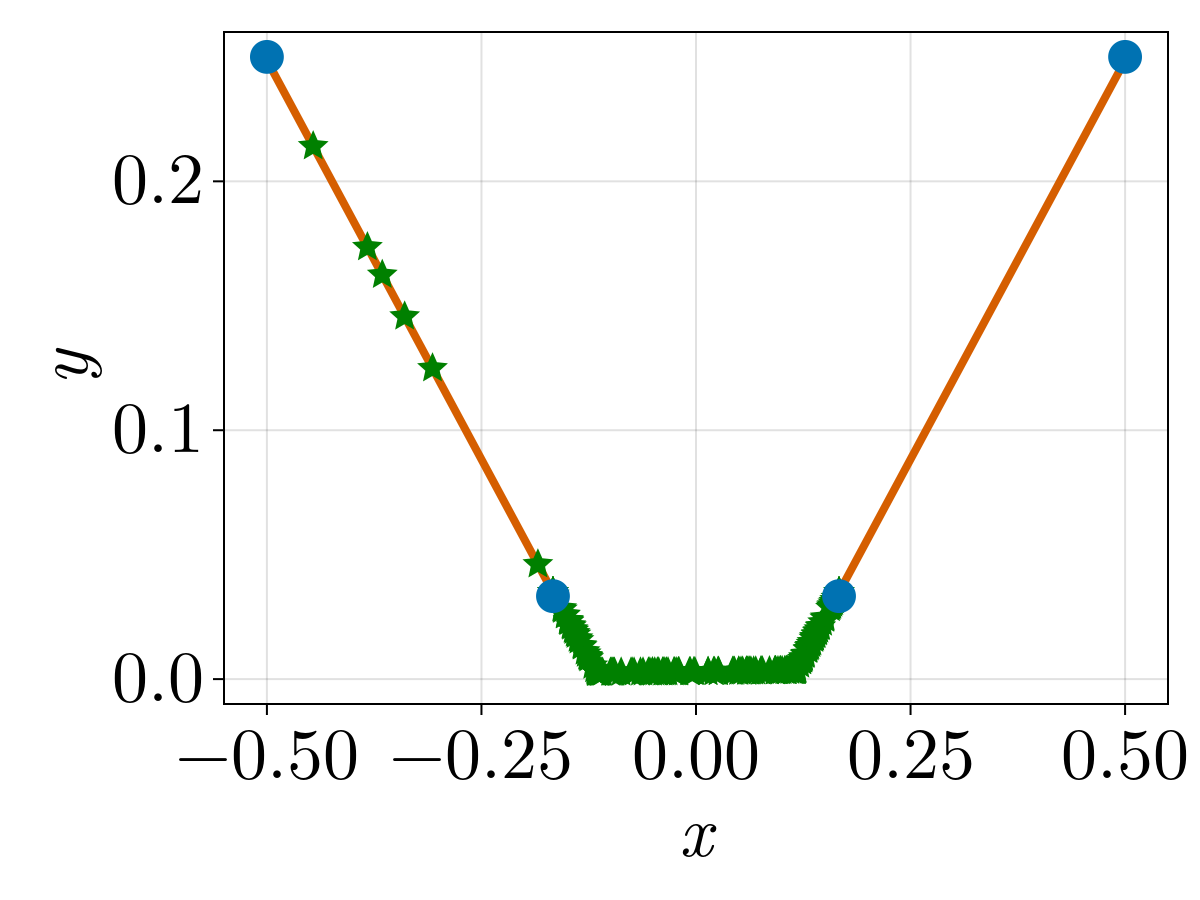

In [111]:
f = Figure()

ax = Axis(f[1, 1], xlabel = L"x", ylabel = L"y", xticks = -0.5:0.25:0.5, yticks=[0.0, 0.1, 0.2])

# Draw NN graph
xgrid = range(xmin, xmax, length = 100)
lines!(ax, xgrid, [forward(nn, p) for p in xgrid]; color=MYORANGE, linewidth=4)

# inflection points 
xinfl = filter(x -> xmin < x < xmax, -nn.b ./ nn.w)
scatter!(ax, xinfl, [forward(nn, x) for x in xinfl]; color=:green, markersize=18, marker=:star5)

# Scatter data points
scatter!(ax, xflat, training_data.y; markersize=24)

# Some more settings
xlims!(ax, -0.5 * 1.1, 0.5 * 1.1)
ylims!(ax, -0.01, 0.26)

f

In [112]:
save("graph NN end.pdf", f)

CairoMakie.Screen{PDF}


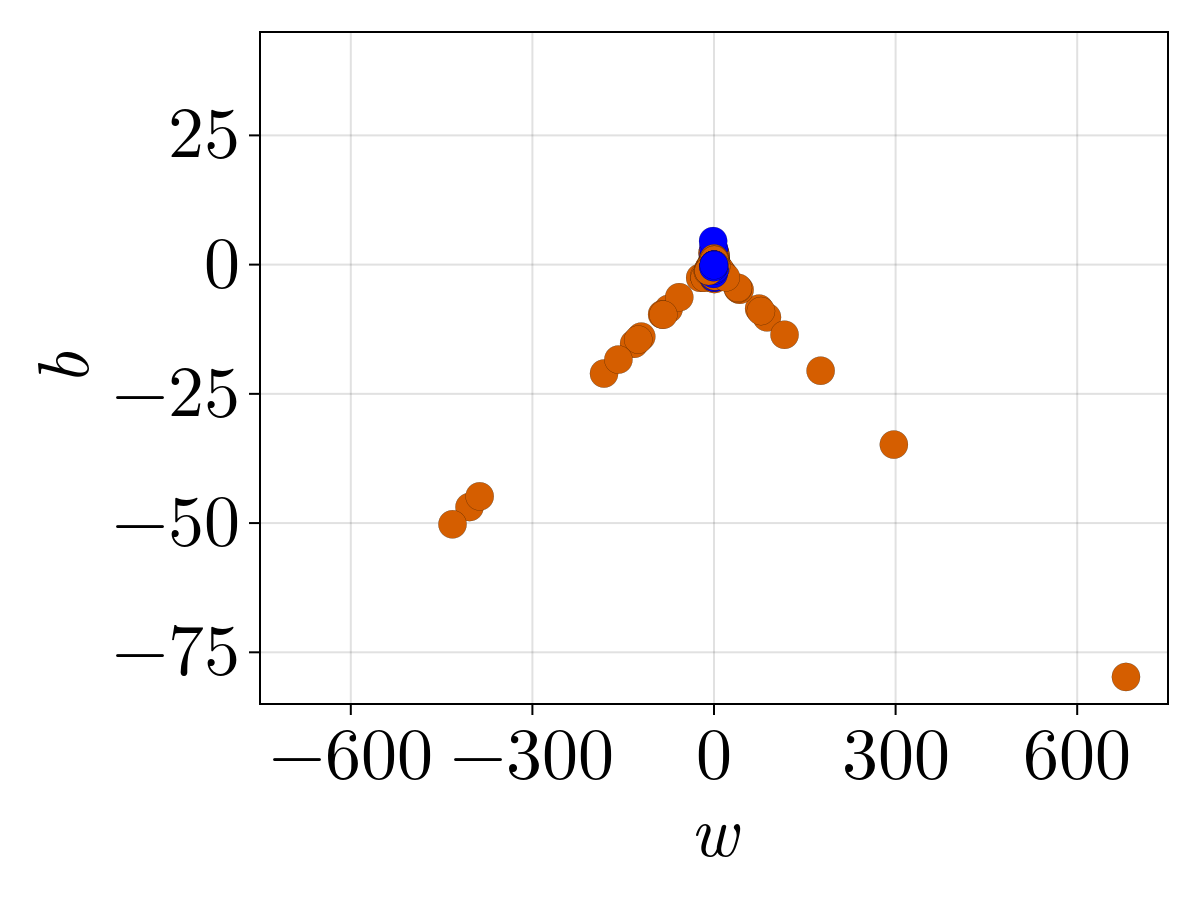

In [113]:
g = Figure() 

ax = Axis(g[1, 1], xlabel = L"w", ylabel = L"b", xticks=-600:300:600) 

scatter!(ax, vec(nn.w), nn.b; markersize=20, strokewidth=0.1, color=[a > 0 ? MYORANGE : :blue for a in nn.a])

xlims!(ax, (- 750, 750))
ylims!(ax, (- 85, 45))

g

In [114]:
save("scat NN end.pdf", g)

CairoMakie.Screen{PDF}
